In [85]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Exercise 2

In [86]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
     def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = 2*(frac-1)*self.freq
        ys = normalize(unbias(ys), self.amp)
        return ys

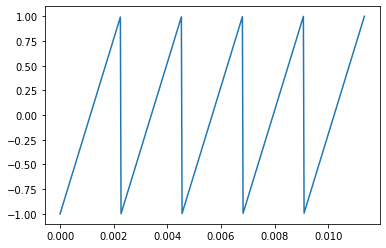

In [87]:
sawtooth = SawtoothSignal().make_wave(duration=1/88, framerate=40000)
sawtooth.plot()

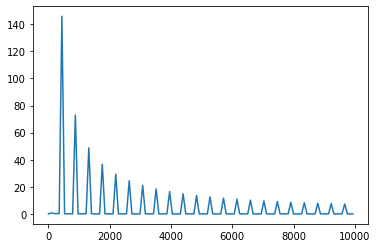

In [88]:
SawtoothSpectrum = sawtooth.make_spectrum()
SawtoothSpectrum.plot(high = 10000)

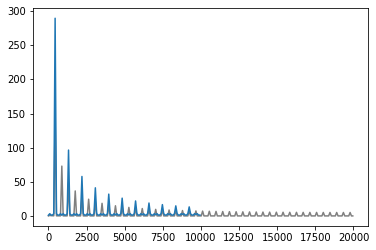

In [89]:
from thinkdsp import SquareSignal
sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal().make_wave(duration=1/88, framerate=40000).make_spectrum().plot(high = 10000)

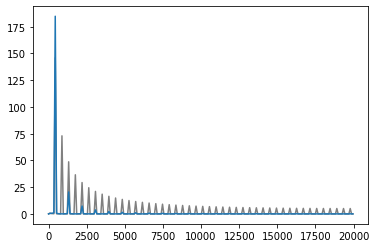

In [90]:
from thinkdsp import TriangleSignal
sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal().make_wave(duration=1/88, framerate=40000).make_spectrum().plot()

藉由兩比較圖可觀察到
Sawtooth signal不像Triangle signal和Square signal只包含基頻奇數倍的諧波
他同時包含了基頻奇數倍與偶數倍的諧波

Exercise 3

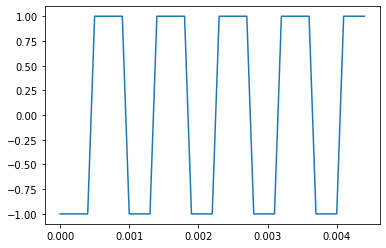

In [91]:
from thinkdsp import SquareSignal
square = SquareSignal(freq = 1100)
SquareWave = square.make_wave(framerate = 10000, duration = 1/220) #週期為1/1000，顯示5個週期的區間
SquareWave.plot()

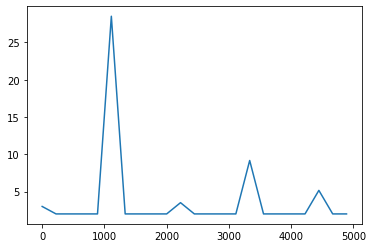

In [92]:
SquareSpectrum = SquareWave.make_spectrum()
SquareSpectrum.plot()

第3高的尖峰落在頻率=4500Hz的點，原應落在5500Hz(10000-5500)
第4高的尖峰落在頻率=2300Hz的點，原應落在7700Hz(10000-7700)
第5高的尖峰落在頻率=100Hz的點，原應落在9900Hz(10000-9900)
此即為aliased現象。

Exercise 4

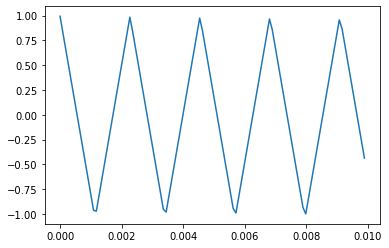

In [93]:
Triangle = TriangleSignal(freq = 440).make_wave(duration = 0.01)
Triangle.plot()

In [94]:
spectrum = Triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

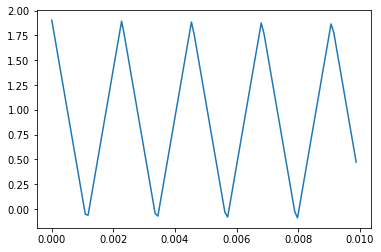

In [95]:
spectrum.hs[0]=100 #依照題意將hs.[0]設定為100
spectrum.make_wave().plot()

圖形較原先往上移動了一個振幅的距離。

Exercise 5

In [96]:
def newSpectrum(spectrum):
    spectrum.hs=spectrum.hs/spectrum.fs #將hs的值除以對應的fs值
    spectrum.hs[0]=0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


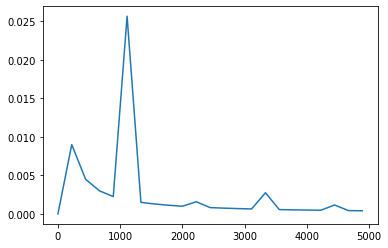

In [97]:
newSpectrum(SquareSpectrum)
SquareSpectrum.plot()

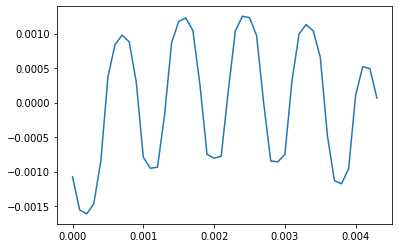

In [98]:
SquareSpectrum.make_wave().plot()

原本的方波經過函式處理後，波形變得與正弦波相似。

Exercise 6

將sawtooth signal的頻譜經過上方的newSpectrum函式處理後，便可得到頻振幅下降速度正比於1/f²的頻譜

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


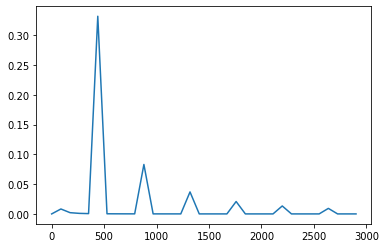

In [99]:
SawtoothSpectrum = sawtooth.make_spectrum()
newSpectrum(SawtoothSpectrum)
SawtoothSpectrum.plot(high = 3000)

基頻與第一諧波的頻率比為2:1，而兩者的振幅以目測的方式推估為4:1，因此振幅下降速度正比於1/f²。

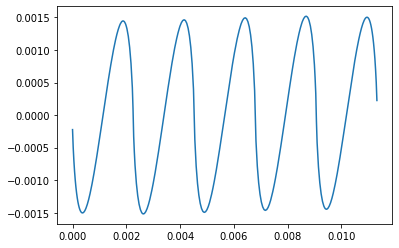

In [100]:
SawtoothWave = SawtoothSpectrum.make_wave()
SawtoothWave.plot()

頻譜的性質與正弦波相似，因此以該頻譜繪製出的波形圖也與正弦波相像。